## note: should be run with python3.6 to be able to use MTK library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob

In [2]:
# check python version
sys.version

'3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]'

In [3]:
# load training dataset
ds_fp = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset/merged_april_2016_9cam3bands.csv"
# ds_fp = "/home/ehsan/misr_lab/training_dataset/april_2016/april_2016_parts/merged_april_2016_9cam_4bands_final_dataset_2.csv"
in_ds = pd.read_csv(ds_fp)

In [4]:
in_ds.head(5)

path  orbit  block  line  sample        lat         lon     Da_r     Ca_r  \
0    90  86889     16   486    1442  80.160977  273.228372  0.85695  0.78779   
1    90  86889     16   487    1442  80.160990  273.224935  0.85457  0.78700   
2    90  86889     16   486    1442  80.160978  273.228178  0.85695  0.78779   
3    90  86889     16   486    1442  80.161238  273.231860  0.85695  0.78779   
4    90  86889     16   486    1442  80.161251  273.228426  0.85695  0.78779   

      Ba_r     Aa_r     An_r     An_g     An_b   An_nir     Af_r     Bf_r  \
0  0.73731  0.70870  0.69518  0.63135  0.78420  0.69518  0.81045  0.97341   
1  0.73612  0.70591  0.69359  0.63294  0.78221  0.69359  0.81045  0.97222   
2  0.73731  0.70870  0.69518  0.63135  0.78420  0.69518  0.81045  0.97341   
3  0.73731  0.70870  0.69518  0.63135  0.78420  0.69518  0.81045  0.97341   
4  0.73731  0.70870  0.69518  0.63135  0.78420  0.69518  0.81045  0.97341   

      Cf_r  Df_r  mean_ATM_roughness  
0  1.23217  -1.0                8.08  
1  1.23455  -1.0                8.01  
2  1.23217  -1.0                8.06  
3  1.23217  -1.0                5.92  
4  1.23217  -1.0                6.53

In [5]:
in_ds.shape

(2924046, 20)

In [6]:
ds_3cam = in_ds[["lat", "lon", "Ca_r", "Cf_r", "An_r", "mean_ATM_roughness"]]


In [7]:
ds_3cam.rename(columns={"mean_ATM_roughness":"rms"}, inplace=True)
# ds_3cam["mean_ATM_roughness"]="rms" # does not work- should use DF.rename()
ds_3cam.columns

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['lat', 'lon', 'Ca_r', 'Cf_r', 'An_r', 'rms'], dtype='object')

In [8]:
# determine range to print based on min, max lat and lon of the data
# is it necessary?
xlon = ds_3cam['lon']
ylat = ds_3cam['lat']


margin = 2 # buffer to add to the range
lat_min = min(ylat) - margin
lat_max = max(ylat) + margin
lon_min = min(xlon) - margin
lon_max = max(xlon) + margin

In [9]:
print(lat_min)
print(lat_max)
print(lon_min)
print(lon_max)

-2.0
86.250712
-2.0
303.192293


In [10]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, num=7))
    lons = m.drawmeridians(np.linspace(-180, 180, num=18))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [11]:
# ref: https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap
# basemap = Basemap(llcrnrlon=lon_min,
#                     llcrnrlat=lat_min,
#                     urcrnrlon=lon_max,
#                     urcrnrlat=lat_max,
#                     lat_0=(lat_max - lat_min)/2,
#                     lon_0=(lon_max-lon_min)/2,
#                     projection='ortho',
#                     resolution = None,
#                     area_thresh=10000.,)

In [12]:
# basemap.shadedrelief()
# basemap.drawcoastlines(color='gray')
# basemap.drawcountries(color='gray')
# basemap.drawstates(color='gray')



# basemap.drawcoastlines()
# basemap.drawcountries()
# basemap.drawstates()
# basemap.drawmapboundary(fill_color='#46bcec')
# basemap.fillcontinents(color = 'white',lake_color='#46bcec')

In [13]:
# fig = plt.figure(figsize=(12, 12))

# basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

# # locations on map: convert lat and lon to map projection coordinates
# xlons, ylats = basemap(xlon, ylat)

# plt.plot(xlons, ylats, 'ok', markersize=1)

# # draw a circle on map on 60N  
# basemap.drawparallels([60], color='red') #, labels='test'????)
# plt.title('Study Region, 60N', fontsize=16)

# draw_map(basemap);

# how zoom to the region?

In [14]:
def make_the_map(XlonSet, YlatSet):
    
    fig = plt.figure(figsize=(12, 12))

    basemap = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=180)

    # locations on map: convert lat and lon to map projection coordinates
    xlons, ylats = basemap(XlonSet, YlatSet)

    plt.plot(xlons, ylats, 'ok', markersize=1)

    # draw a circle on map on 60N  
    basemap.drawparallels([60], color='red') #, labels='test'????)
    plt.title('Study Region, 60N', fontsize=16)

    draw_map(basemap);
    return 0;

0

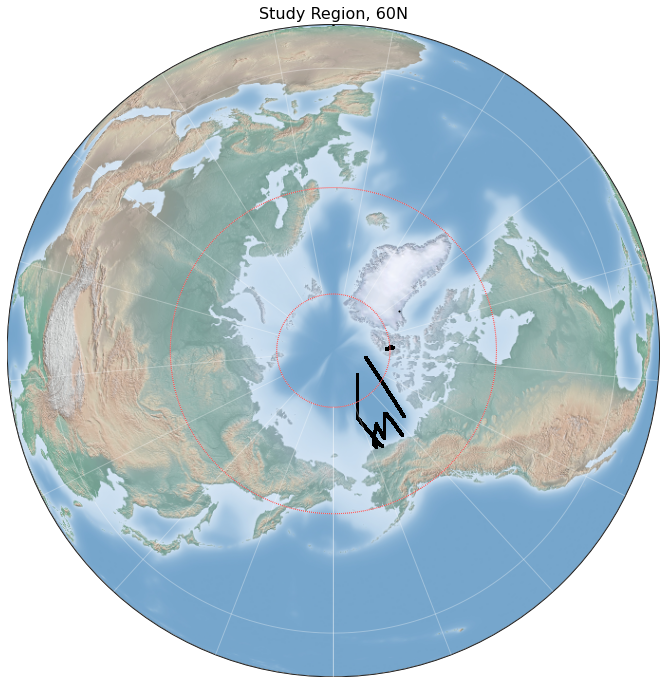

In [15]:
# run with oython >= 3.8

make_the_map(xlon, ylat)

In [16]:
# extract transect
transect = ds_3cam.loc[(ds_3cam['lon'] > 200.0) & (ds_3cam['lon'] < 230.0)]
transect

lat         lon     Ca_r     Cf_r     An_r    rms
41400    73.481263  204.494721  0.94700  2.75410  0.65631   5.36
41401    73.481397  204.496472  0.94700  2.75410  0.65631   4.75
41402    73.481279  204.494929  0.94700  2.75410  0.65631   5.24
41403    73.480875  204.493210  0.94700  2.75410  0.65631   5.14
41404    73.481010  204.494962  0.94700  2.75410  0.65631   4.71
...            ...         ...      ...      ...      ...    ...
2924040  71.684357  203.358881  0.34876  0.51156  0.23435  17.70
2924041  71.683906  203.357353  0.36247  0.48083  0.22142  47.00
2924042  71.684094  203.358918  0.36247  0.48083  0.22142  31.50
2924043  71.684281  203.360483  0.34876  0.51156  0.23435  26.62
2924044  71.684125  203.359176  0.36247  0.48083  0.22142  25.42

[1171122 rows x 6 columns]

In [17]:
# create a column as index and set that column as index to plot transect

# lon_subset['index'] = [i for i in range(len(lon_subset['lon']))]
transect.index = range(1,len(transect)+1)
transect.head()

# set that column as index
# lon_subset.set_index['index']

lat         lon   Ca_r    Cf_r     An_r   rms
1  73.481263  204.494721  0.947  2.7541  0.65631  5.36
2  73.481397  204.496472  0.947  2.7541  0.65631  4.75
3  73.481279  204.494929  0.947  2.7541  0.65631  5.24
4  73.480875  204.493210  0.947  2.7541  0.65631  5.14
5  73.481010  204.494962  0.947  2.7541  0.65631  4.71

In [18]:
# select a smaller subset of transect, like the first 1000 points (or 10)
transect_small = transect.iloc[0:10000]
transect_small

lat         lon   Ca_r    Cf_r     An_r   rms
1      73.481263  204.494721  0.947  2.7541  0.65631  5.36
2      73.481397  204.496472  0.947  2.7541  0.65631  4.75
3      73.481279  204.494929  0.947  2.7541  0.65631  5.24
4      73.480875  204.493210  0.947  2.7541  0.65631  5.14
5      73.481010  204.494962  0.947  2.7541  0.65631  4.71
...          ...         ...    ...     ...      ...   ...
9996   73.271297  204.692105 -1.000 -1.0000 -1.00000  6.64
9997   73.271432  204.693825 -1.000 -1.0000 -1.00000  5.41
9998   73.271332  204.692548 -1.000 -1.0000 -1.00000  6.44
9999   73.270908  204.690624 -1.000 -1.0000 -1.00000  9.57
10000  73.271043  204.692344 -1.000 -1.0000 -1.00000  6.86

[10000 rows x 6 columns]

In [19]:
xlon270 = transect_small['lon']
ylat270 = transect_small['lat']

0

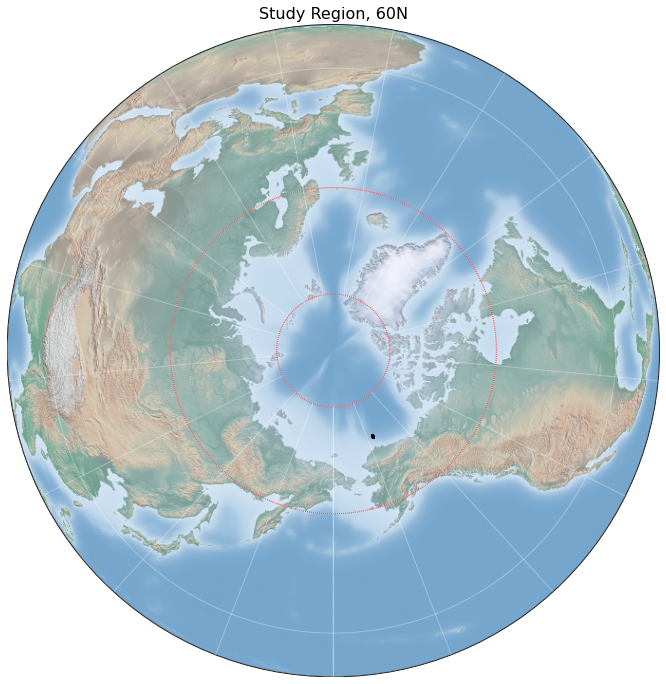

In [20]:
# run with oython >= 3.8

make_the_map(xlon270, ylat270)

In [21]:
# # write out the transect data out
# output_filename = "3cams_outofsample_atm.csv"
# # output_filename = "3cams_insample_atm.csv"
# output_path = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"

# transect_small.to_csv(os.path.join(output_path, output_filename))
